In [3]:
#TITANIC DATASET ANALYSIS AND PREDICTION

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow as tf





In [5]:
dataset = pd.read_csv("titanic.csv")
dataset.shape
dataset.dropna(axis=0, inplace=True, subset=["Sex", "Age", "SibSp", "Parch", "Pclass","Embarked","Fare"])
#print(dataset)
y = dataset["Survived"]
X = dataset.iloc[:, 4:8]
X=np.column_stack((X, dataset["Pclass"]))
X= np.column_stack((X,dataset["Embarked"]))
X=np.column_stack((X, dataset["Fare"]))
X = pd.DataFrame(data=dataset, columns=["Sex", "Age", "SibSp", "Parch", "Pclass","Embarked","Fare"])
#X.dropna(axis=0, inplace=False)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=32)
X_train.shape
X_test.shape
y_train
y_test

#X_train.dropna(subset=["Pclass"])
#X_train

430    1
14     0
770    0
750    1
287    0
      ..
78     1
800    0
623    0
16     0
120    0
Name: Survived, Length: 143, dtype: int64

In [7]:
##DATA VISUALIZATION BELOW

In [8]:

dataset.Embarked.value_counts()
print(X.columns)
dataset.describe()

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Pclass', 'Embarked', 'Fare'], dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


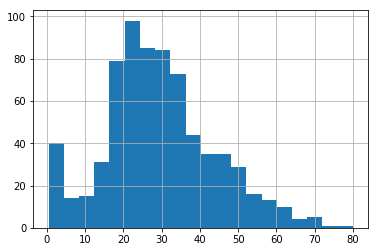

In [9]:
dataset.Age.hist(bins=20)

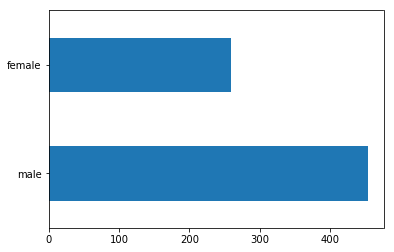

In [10]:
dataset.Sex.value_counts().plot(kind='barh')

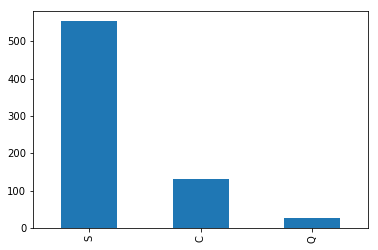

In [11]:
dataset.Embarked.value_counts().plot(kind='bar')

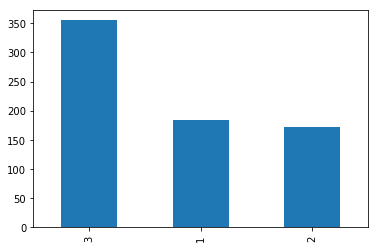

In [12]:
dataset.Pclass.value_counts().plot(kind='bar')

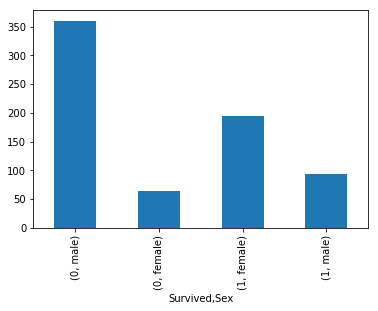

In [13]:
dataset.groupby('Survived')['Sex'].value_counts().plot(kind='bar')

In [14]:
##LINEAR REGRESSION WITH TENSORFLOW BELOW

In [15]:
CAT_COL = ["Sex", "Embarked", "Pclass"]
NUM_COL = ["Age", "Fare","Parch","SibSp"]
print(X["Age"].unique())
feature_col = []
for col in CAT_COL :
    vocab = X[col].unique()  #list of all unique values
    feature_col.append(tf.feature_column.categorical_column_with_vocabulary_list(col, vocab))
    
for col in NUM_COL:
    feature_col.append(tf.feature_column.numeric_column(col, dtype= tf.float32))
    

[22.   38.   26.   35.   54.    2.   27.   14.    4.   58.   20.   39.
 55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]


In [16]:
feature_col

[VocabularyListCategoricalColumn(key='Sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='Embarked', vocabulary_list=('S', 'C', 'Q'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='Pclass', vocabulary_list=(3, 1, 2), dtype=tf.int64, default_value=-1, num_oov_buckets=0),
 NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='Parch', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='SibSp', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [17]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():  #inner function, this will be returned
        #create tf.data.Dataset object with data and its label
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) 
        if shuffle:
            ds = ds.shuffle(1000) #randomize order of data
        ds = ds.batch(batch_size).repeat(num_epochs) #split into batches of 32, repeat process for number of epochs
        return ds  #return a batch of dataset
    return input_function  #return a function object for use

train_input_fn = make_input_fn(X_train, y_train)
test_input_fn = make_input_fn(X_test, y_test, num_epochs=1, shuffle=False)


In [18]:
#dict(X_train)
print(train_input_fn)

<function make_input_fn.<locals>.input_function at 0x000001D129857708>


In [19]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_col)
linear_est.train(train_input_fn)
#result = linear_est.predict(test_input_fn)
#print(result["accuracy"])

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\91930\\AppData\\Local\\Temp\\tmpybchlca5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I

In [20]:
test_result = linear_est.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-07-24T20:24:29Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\91930\AppData\Local\Temp\tmpybchlca5\model.ckpt-180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.58309s
INFO:tensorflow:Finished evaluation at 2020-07-24-20:24:31
INFO:tensorflow:Saving dict for global step 180: ac

In [21]:
result = list(linear_est.predict(test_input_fn))
print(X_test.loc[1])
print(y_test.loc[1])
print(result[1]["probabilities"][1])
res = []
for i in range(len(result)):
    if result[i]["probabilities"][1]>=0.5:
        res.append(1)
    else:
        res.append(0)
        

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\91930\AppData\Local\Temp\tmpybchlca5\model.ckpt-180
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Sex          female
Age              38
SibSp             1
Parch             0
Pclass            1
Embarked          C
Fare        71.2833
Name: 1, dtype: object
1
0.7984678


In [22]:
print(len(res))
X_test.shape

143


(143, 7)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, res)
cm


array([[60, 27],
       [11, 45]], dtype=int64)

In [24]:
104/143
##TEST SET ACCURACY - 73%

0.7272727272727273

In [25]:
##LINEAR REGRESSION WITH SKLEARN BELOW

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_train = np.array(columnTransformer.fit_transform(X_train), dtype = np.str)

In [71]:
X_train

array([['1.0', '0.0', '45.0', '2.0', '26.25'],
       ['0.0', '1.0', '21.0', '3.0', '7.7958'],
       ['0.0', '1.0', '28.0', '3.0', '7.8958'],
       ...,
       ['1.0', '0.0', '20.0', '3.0', '9.825'],
       ['1.0', '0.0', '36.0', '2.0', '13.0'],
       ['1.0', '0.0', '18.0', '1.0', '227.525']], dtype='<U32')

In [31]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X_train = np.array(columnTransformer.fit_transform(X_train), dtype = np.str)


In [32]:
X_test

,Sex,Age,SibSp,Parch,Pclass,Embarked,Fare
430,male,28.00,0,0,1,S,26.5500
14,female,14.00,0,0,3,S,7.8542
770,male,24.00,0,0,3,S,9.5000
750,female,4.00,1,1,2,S,23.0000
287,male,22.00,0,0,3,S,7.8958
...,...,...,...,...,...,...,...
78,male,0.83,0,2,2,S,29.0000
800,male,34.00,0,0,2,S,13.0000
623,male,21.00,0,0,3,S,7.8542
16,male,2.00,4,1,3,Q,29.1250


In [85]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_test = np.array(columnTransformer.fit_transform(X_test), dtype = np.str)
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X_test = np.array(columnTransformer.fit_transform(X_test), dtype = np.str)


IndexError: index 6 is out of bounds for axis 0 with size 5

In [86]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [35]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
y_pred_test = regressor.predict(X_test)

In [37]:
X_train

array([[ 0.    ,  0.    ,  1.    , ...,  0.    ,  3.    ,  9.5   ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  3.    ,  7.925 ],
       [ 0.    ,  0.    ,  1.    , ...,  1.    ,  2.    , 26.25  ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  3.    , 14.4583],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  2.    , 12.    ],
       [ 0.    ,  0.    ,  1.    , ...,  0.    ,  1.    , 26.2875]],
      dtype=float32)

In [38]:
y_pred_test

array([ 0.489538  ,  0.71592927,  0.1374774 ,  0.89562285,  0.15016907,
        0.2989297 ,  0.09153998,  0.9801729 ,  0.6052326 ,  0.13699013,
        0.8581869 ,  0.17106837,  0.75279886,  0.22781897,  0.31195283,
        0.28853577,  0.15014839,  0.09695113,  0.7559396 ,  0.8479074 ,
        0.27288342,  0.5657095 ,  0.78672016,  0.15305841,  0.03947842,
        0.32497597,  0.08505332,  1.0847458 ,  0.56631404,  0.15003562,
        0.5820644 ,  0.53416806,  0.22781897,  0.6643868 ,  0.78666097,
        0.16973561,  0.3059578 ,  0.02693033,  0.4774053 ,  0.16975802,
        0.09509552,  0.8706163 ,  0.66381514,  0.57367074,  0.311059  ,
        0.66730106,  0.3656193 ,  0.10291672,  0.6898089 ,  0.05892444,
        0.3186897 , -0.17201126, -0.01247799,  0.5736706 ,  0.26039726,
        0.44160366,  0.8924959 ,  0.5665213 ,  0.3955896 ,  0.25655144,
        0.17629886,  0.15980297,  0.33872586,  0.05900705,  0.18288535,
        0.09509552,  1.0040249 ,  0.55306983,  0.10461986,  0.72

In [39]:
y_pred_train = regressor.predict(X_train)
y_pred_train

array([ 1.63523674e-01,  4.37890291e-02,  1.28666997e-01,  2.79394984e-01,
        2.53348708e-01,  3.64251971e-01,  2.86423087e-01,  2.70698667e-01,
        9.76909399e-02,  1.01459289e+00,  6.64512396e-01,  2.92418122e-01,
        4.36051369e-01,  4.96546626e-01,  6.47502065e-01,  2.48610020e-01,
        3.56945276e-01,  1.56791687e-01,  1.03409791e+00,  7.52273440e-01,
        2.88993955e-01,  9.27888989e-01,  2.30505168e-01,  1.08474576e+00,
        3.01096678e-01,  6.63820326e-01,  1.32372618e-01,  9.90225077e-02,
        1.98662281e-02,  1.01690078e+00,  1.29002869e-01,  3.60463500e-01,
        1.16662443e-01,  1.04312015e+00,  9.45922971e-01,  1.96682334e-01,
        8.38119209e-01,  1.11091018e-01,  5.68270862e-01,  6.87629938e-01,
        4.18936372e-01,  1.44589782e-01,  1.05941761e+00,  1.89213514e-01,
       -1.88457370e-01,  1.02704406e+00,  3.25467527e-01,  5.97389936e-02,
        2.60929346e-01,  7.75638819e-01,  6.48006797e-01,  1.51649356e-01,
        1.50091588e-01,  

In [40]:
y_pred_train = y_pred_train >= 0.5

In [41]:
y_pred_test = y_pred_test >= 0.5

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train , y_pred_train)
cm

array([[294,  43],
       [ 67, 165]], dtype=int64)

In [43]:
459/569
##ACCURACY ON TRAINING SET -- 81%

0.8066783831282952

In [44]:
cm = confusion_matrix(y_test , y_pred_test)
cm

array([[69, 18],
       [19, 37]], dtype=int64)

In [45]:
105/143
##ACCURACY ON TEST SET -- 74%

0.7342657342657343

In [46]:
##CLASSIFICATION USING TENSOR FLOW

In [47]:
def input_fn(features, labels, training=True, batch_size=256):
    
    #Convert the inputs to a dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    
    #Shuffle and repeat if you are in training mode
    if training:
        dataset  = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)


    

In [48]:
categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(key="Sex", vocabulary_list=["male", "female"], default_value=0)
feature_col = [
    tf.feature_column.numeric_column(key='Pclass'),
    tf.feature_column.indicator_column(categorical_column),
    tf.feature_column.numeric_column(key='Age')
]

In [49]:
#feature columns describe how to use the input
CAT_COL = ["Sex", "Embarked", "Pclass"]
NUM_COL = ["Age", "Fare","Parch","SibSp"]
#print(X["Age"].unique())
feature_col = []
for col in CAT_COL :
    vocab = X_train[col].unique()  #list of all unique values
    feature_col.append(tf.feature_column.categorical_column_with_vocabulary_list(col, vocab))
    
for col in NUM_COL:
    feature_col.append(tf.feature_column.numeric_column(col, dtype= tf.float32))
 
print(feature_col)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [199]:
# Build DNN with 2 hidden layers with 30 and 10 hidden nodes each
classifier = tf.estimator.DNNClassifier(
    feature_columns = feature_col,
    # 2 hidden layers with 30 and 10 nodes respectively
    hidden_units = [30,10],
    #model must choose between 1 classes 
    n_classes=2

)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\91930\\AppData\\Local\\Temp\\tmpi3q8xg0o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [200]:
classifier.train(
    input_fn= lambda: input_fn(X_train, y_train, training=True),
    steps=5000
)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\91930\AppData\Local\Temp\tmpi3q8xg0o\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:lo

In [201]:
test_result = classifier.evaluate(
    input_fn = lambda: input_fn(X_test, y_test, training= False)
)
print("\ntest set {accuracy:0.3f}\n".format(**test_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-07-23T18:24:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\91930\AppData\Local\Temp\tmpi3q8xg0o\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 3.12427s
INFO:tensorflow:Finished evaluation at 2020-07-23-18:24:43
INFO:tensorflow:Saving dict for global step 5000: 

In [202]:
result = list(classifier.predict(test_input_fn))
print(X_test.loc[1])
print(y_test.loc[1])
print(result[1]["probabilities"][1])
res = []
for i in range(len(result)):
    if result[i]["probabilities"][1]>=0.5:
        res.append(1)
    else:
        res.append(0)
        

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\91930\AppData\Local\Temp\tmpi3q8xg0o\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Sex          female
Age              38
SibSp             1
Parch             0
Pclass            1
Embarked          C
Fare        71.2833
Name: 1, dtype: object
1
0.4461922


In [203]:
res

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0]

In [204]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(res , y_test)
cm

array([[81, 24],
       [ 6, 32]], dtype=int64)

In [205]:
113/143
##ACCURACY ON TEST SET-- 80%


0.7902097902097902

In [ ]:
##SKLEARN LOGISTIC REGRESSION

In [72]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


C:\Users\91930\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
y_pred_train = classifier.predict(X_train)

In [78]:
y_pred_train.shape

(571,)

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train , y_pred_train)
cm

array([[286,  50],
       [ 65, 170]], dtype=int64)

In [80]:
456/569
#ACCURACY ON TRAINING SET -- 82%

0.8014059753954306

In [56]:
y_pred_test = classifier.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred_test)
cm

array([[71, 16],
       [18, 38]], dtype=int64)

In [58]:
109/143
#ACCURACY ON TEST SET -- 77%

0.7622377622377622

In [59]:
##SKLEARN KERNEL SVM

In [113]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'rbf', random_state = 0)
classifier_svc.fit(X_train, y_train)


C:\Users\91930\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [114]:
# Predicting the Train set results
y_pred_train = classifier_svc.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_train, y_train)
cm


array([[323,  29],
       [ 13, 206]], dtype=int64)

In [115]:
529/571
#ACCURACY ON TRAINING SET -- 92%

0.9264448336252189

In [116]:
# Predicting the Test set results
y_pred_test = classifier_svc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_test, y_test)
cm


array([[61, 21],
       [27, 34]], dtype=int64)

In [64]:
105/143
#ACCURACY ON TEST SET -- 74%

0.7342657342657343

In [66]:
dataset = pd.read_csv("titanic.csv")
dataset.shape
dataset.dropna(axis=0, inplace=True, subset=["Sex", "Age", "Pclass","Fare"])
#print(dataset)
y = dataset["Survived"]
X = dataset.iloc[:, 4:8]
X=np.column_stack((X, dataset["Pclass"]))
X= np.column_stack((X,dataset["Embarked"]))
X=np.column_stack((X, dataset["Fare"]))
X = pd.DataFrame(data=dataset, columns=["Sex", "Age", "Pclass","Fare"])
#X.dropna(axis=0, inplace=False)


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=32)
X_train.shape
X_test.shape
y_train
y_test

#X_train.dropna(subset=["Pclass"])
#X_train

429    1
14     0
592    0
751    1
286    1
      ..
75     0
801    1
623    0
16     0
119    0
Name: Survived, Length: 143, dtype: int64

In [91]:
##SKLEARN RANDOM FOREST

In [103]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [104]:
y_pred_train = classifier_rf.predict(X_train)


In [105]:
y_pred_test = classifier_rf.predict(X_test)
y_pred_test.shape


(143,)

In [106]:
# Predicting the Test set results
y_pred_test = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_test, y_test)
cm


array([[74, 16],
       [14, 39]], dtype=int64)

In [107]:
113/143
#ACCURACY ON TEST SET--80%

0.7902097902097902

In [108]:
# Predicting the Train set results
y_pred_test = classifier_rf.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_train, y_train)
cm


array([[332,  15],
       [  4, 220]], dtype=int64)

In [109]:
552/571
#ACCURACY ON TRAIN SET-- 97%

0.9667250437828371

In [110]:
pred = classifier_rf.predict([[1.0,0.0, 8, 2, 250.25]])

In [112]:
import joblib
joblib.dump(classifier_rf, "rf_titanic.pkl")


['rf_titanic.pkl']

In [117]:
joblib.dump(classifier_svc, "svc_titanic.pkl")


['svc_titanic.pkl']